# Capstone Project. **Real Estate Valuation Descriptive Statistics**  
#### **Angela Brito**
#### Bachelor in Data and Business Analytics


Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
enriched_data = pd.read_csv('/content/drive/MyDrive/TFG/Dataset/TFG_finaldata.csv')

In [4]:
enriched_data.head(5)

,Unnamed: 0,price,baths,rooms,sqft,description,address,typology,Terrace,Garage,...,"Formación profesional 2º grado, Bachiller Superior o BUP","Titulaciones medias, diplomatura, arquitectura o ingeniería técnica","Estudios superiores, licenciatura, arquitectura superior, estudios superiores no universitarios, docturado, estudios de posgrado",Nivel de estudios desconocido y no consta,Average House Size,Number of Houses,Cadastral Value of Properties,Number of Concertado Schools,Number of Private Schools,Number of Public Schools
0,0,1920000,3,3,183,residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,False,False,...,0.178143,0.101468,0.530486,0.001172,1.153072,0.050842,1.749829,0.655892,0.188937,0.155171
1,1,1995000,3,3,170,"preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,True,True,...,0.178143,0.101468,0.530486,0.001172,1.153072,0.050842,1.749829,0.655892,0.188937,0.155171
2,2,1300000,3,4,270,de salas consultores inmobiliarios mav02679 le...,"Hortaleza, Madrid",Pisos,True,True,...,0.198768,0.109553,0.368660,0.000640,1.333466,0.056181,1.196373,0.323478,0.362814,0.313708
3,3,1650000,3,3,248,gilmar real estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,True,True,...,0.176317,0.104507,0.536380,0.002315,1.166061,0.045221,1.648696,0.457255,0.336839,0.205906
4,4,1590750,3,3,116,descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,False,True,...,0.178143,0.101468,0.530486,0.001172,1.153072,0.050842,1.749829,0.655892,0.188937,0.155171


In [5]:
print(enriched_data.dtypes[0])

int64


In [6]:
enriched_data.columns

Index(['Unnamed: 0', 'price', 'baths', 'rooms', 'sqft', 'description',
       'address', 'typology', 'Terrace', 'Garage', 'Pool', 'Garden',
       'Exterior', 'RecentlyRenovated', 'HighFloor', 'NaturalLight', 'Views',
       'ClimateControl', 'EnergyEfficient', 'Security', 'Accessible',
       'SouthFacing', 'EastFacing', 'NorthFacing', 'WestFacing', 'NearSchool',
       'NearAmenities', 'NearMetro', 'NearLandmark', 'District',
       'price_per_sqft', 'Surface', 'Density', 'Population Median Age',
       'People with Spanish Nationality', 'People with Foreign Nationality',
       'Households', 'Median House Size', 'Demographic Growth Rate',
       'Median Income', 'Median Unemployment Rate', 'Median House Age',
       'Education Level', 'Primaria incompleta',
       'Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado',
       'Formación profesional 2º grado, Bachiller Superior o BUP',
       'Titulaciones medias, diplomatura, arquitectura o ingeniería técnica',

In [7]:
enriched_data = enriched_data.drop(columns='Unnamed: 0', errors='ignore')

In [8]:
numeric_data = enriched_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

high_corr_vars = correlation_matrix.index[abs(correlation_matrix['price']) > 0.5]

descriptive_stats = enriched_data[high_corr_vars].describe()

print(descriptive_stats)


              price       baths       rooms         sqft
count  9.130000e+02  913.000000  913.000000   913.000000
mean   1.291006e+06    2.901424    3.477547   217.412924
std    1.037208e+06    1.626645    1.594188   191.886118
min    1.220000e+05    1.000000    0.000000    14.000000
25%    6.250000e+05    2.000000    2.000000   104.000000
50%    9.900000e+05    3.000000    3.000000   158.000000
75%    1.650000e+06    4.000000    4.000000   264.000000
max    8.900000e+06   12.000000   12.000000  1768.000000


In [9]:
numeric_columns =[]
for column in enriched_data.select_dtypes(include=['float', 'int64']).columns:
  if column != 'id' and column != 'Unnamed: 0':
    numeric_columns.append(column)

In [10]:
numeric_columns

['price',
 'baths',
 'rooms',
 'sqft',
 'price_per_sqft',
 'Surface',
 'Density',
 'Population Median Age',
 'People with Spanish Nationality',
 'People with Foreign Nationality',
 'Households',
 'Median House Size',
 'Demographic Growth Rate',
 'Median Income',
 'Median Unemployment Rate',
 'Median House Age',
 'Education Level',
 'Primaria incompleta',
 'Bachiller Elemental, Graduado Escolar, ESO, Formación profesional 1º grado',
 'Formación profesional 2º grado, Bachiller Superior o BUP',
 'Titulaciones medias, diplomatura, arquitectura o ingeniería técnica',
 'Estudios superiores, licenciatura, arquitectura superior, estudios superiores no universitarios, docturado, estudios de posgrado',
 'Nivel de estudios desconocido y no consta',
 'Average House Size',
 'Number of Houses',
 'Cadastral Value of Properties',
 'Number of Concertado Schools',
 'Number of Private Schools',
 'Number of Public Schools']

In [11]:
desc_stats = enriched_data.describe(include='all')

In [12]:
freq_counts = enriched_data.select_dtypes(include=['object']).apply(pd.Series.value_counts)

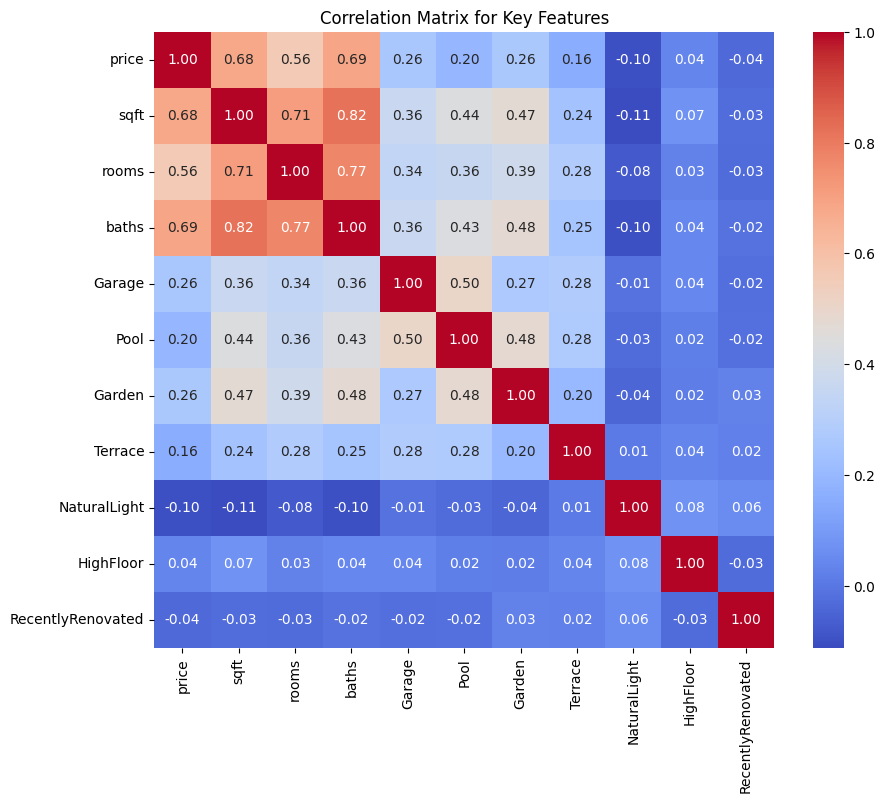

In [13]:
key_features = [
    'price', 'sqft', 'rooms', 'baths', 'Garage', 'Pool', 'Garden',
    'Terrace', 'NaturalLight', 'HighFloor', 'RecentlyRenovated'
]

for feature in key_features:
    if enriched_data[feature].dtype == 'object':
        enriched_data[feature] = pd.to_numeric(enriched_data[feature], errors='coerce')

enriched_data = enriched_data.dropna(subset=key_features)

correlation_matrix = enriched_data[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Key Features')
plt.show()

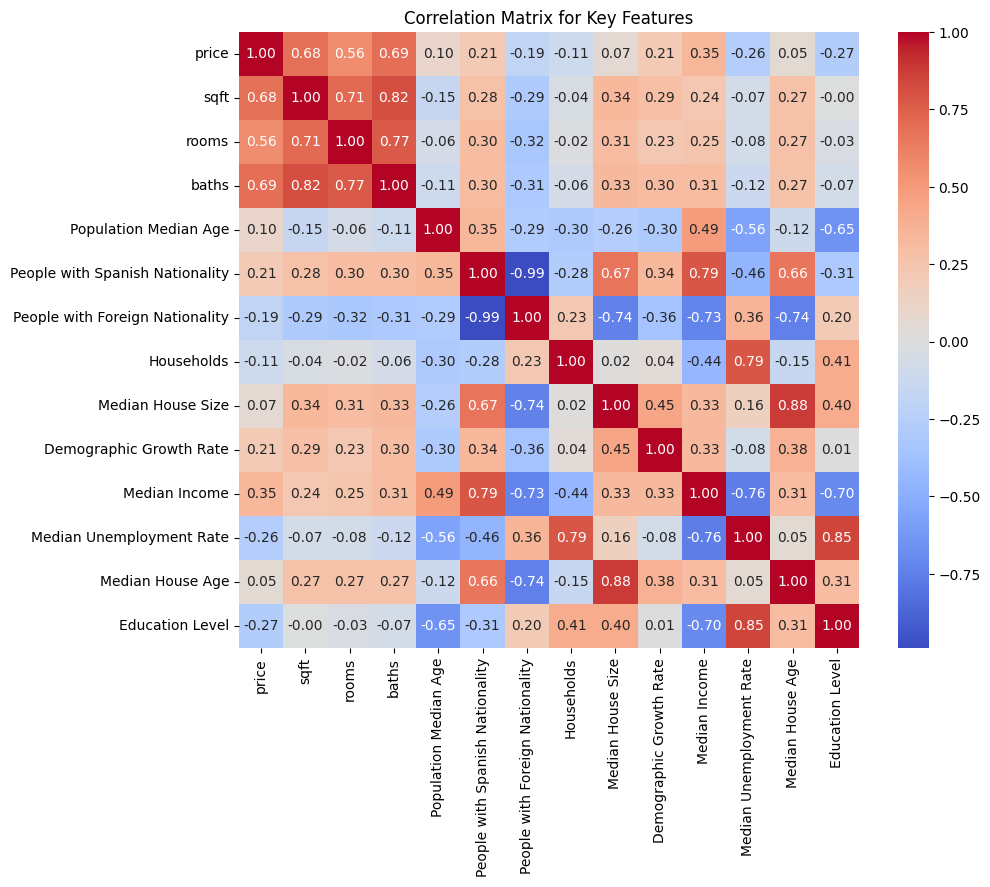

In [14]:
key_features = [
    'price', 'sqft', 'rooms', 'baths', 'Population Median Age',
 'People with Spanish Nationality',
 'People with Foreign Nationality',
 'Households',
 'Median House Size',
 'Demographic Growth Rate',
 'Median Income',
 'Median Unemployment Rate',
 'Median House Age',
 'Education Level',
]

for feature in key_features:
    if enriched_data[feature].dtype == 'object':
        enriched_data[feature] = pd.to_numeric(enriched_data[feature], errors='coerce')

enriched_data = enriched_data.dropna(subset=key_features)

correlation_matrix = enriched_data[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Key Features')
plt.show()


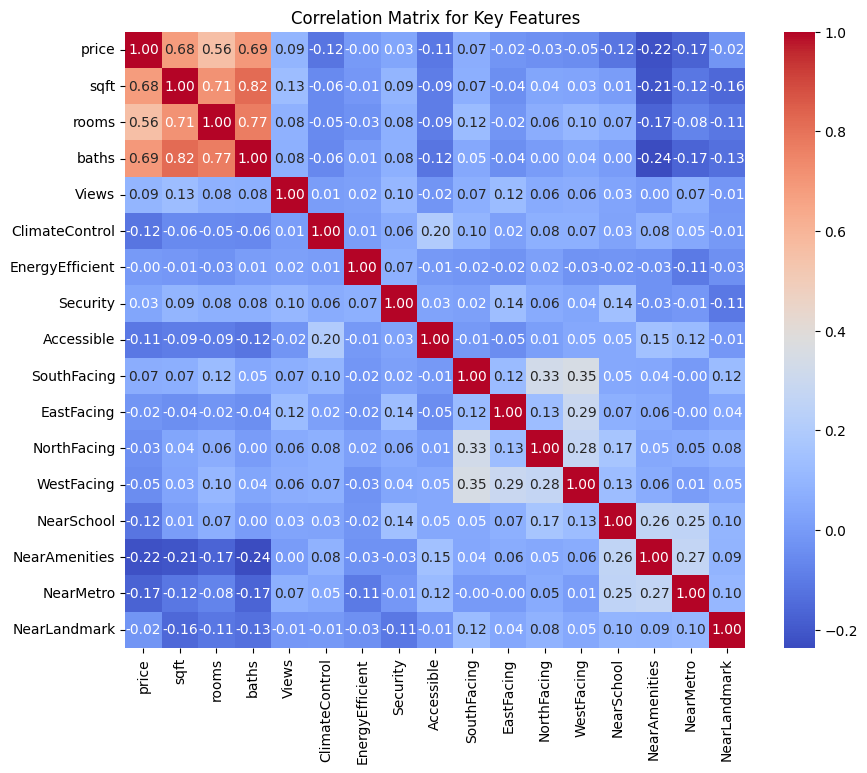

In [15]:

key_features = [
    'price', 'sqft', 'rooms', 'baths', 'Views', 'ClimateControl',
       'EnergyEfficient', 'Security', 'Accessible', 'SouthFacing',
       'EastFacing', 'NorthFacing', 'WestFacing', 'NearSchool',
       'NearAmenities', 'NearMetro', 'NearLandmark'
]


for feature in key_features:
    if enriched_data[feature].dtype == 'object':
        enriched_data[feature] = pd.to_numeric(enriched_data[feature], errors='coerce')

enriched_data = enriched_data.dropna(subset=key_features)

correlation_matrix = enriched_data[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Key Features')
plt.show()

In [16]:

high_corr_vars = correlation_matrix.index[abs(correlation_matrix['price']) > 0.5]

descriptive_stats = enriched_data[high_corr_vars].describe()

print(descriptive_stats)


              price         sqft       rooms       baths
count  9.130000e+02   913.000000  913.000000  913.000000
mean   1.291006e+06   217.412924    3.477547    2.901424
std    1.037208e+06   191.886118    1.594188    1.626645
min    1.220000e+05    14.000000    0.000000    1.000000
25%    6.250000e+05   104.000000    2.000000    2.000000
50%    9.900000e+05   158.000000    3.000000    3.000000
75%    1.650000e+06   264.000000    4.000000    4.000000
max    8.900000e+06  1768.000000   12.000000   12.000000


In [17]:

price_stats_by_rooms = enriched_data.groupby('rooms')['price'].describe()

print("Price Statistics by Number of Rooms:")
price_stats_by_rooms


Price Statistics by Number of Rooms:


,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0,8.0,3.122909e+05,9.978437e+04,169000.0,247500.0,308500.0,395000.0,442327.0
1,53.0,3.697453e+05,1.583475e+05,125000.0,260000.0,349000.0,430000.0,790000.0
2,200.0,7.186572e+05,3.976578e+05,122000.0,423125.0,680000.0,859250.0,2100000.0
3,253.0,1.030375e+06,6.142087e+05,145000.0,599000.0,890000.0,1320000.0,5000000.0
4,184.0,1.636765e+06,1.161519e+06,239900.0,950000.0,1300000.0,2018750.0,7900000.0
5,128.0,1.916645e+06,1.194888e+06,498000.0,1093500.0,1482500.0,2462500.0,8900000.0
6,50.0,2.050540e+06,9.850929e+05,675000.0,1312000.0,1850000.0,2500000.0,4950000.0
7,22.0,2.760227e+06,1.349287e+06,875000.0,1625000.0,2850000.0,3200000.0,5500000.0
8,10.0,2.842500e+06,1.276499e+06,1237000.0,1987500.0,2700000.0,3462500.0,5500000.0


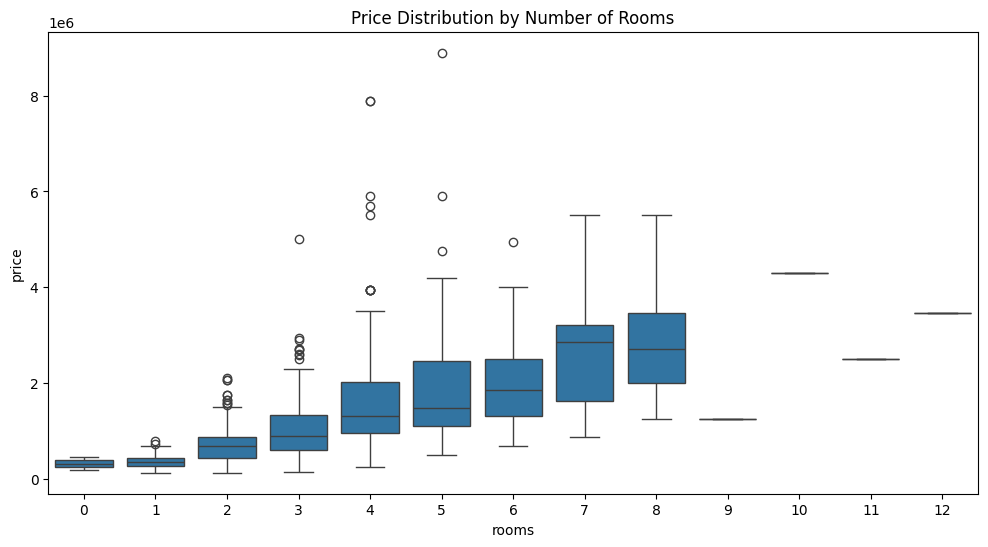

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='rooms', y='price', data=enriched_data)
plt.title('Price Distribution by Number of Rooms')
plt.show()


##**Statistical summary by feature**

In [19]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'price' is your target variable
for feature in numeric_columns:
    print(f"Feature: {feature}")
    print(enriched_data.groupby(feature)['price'].describe(), '\n')


Feature: price
         count       mean  std        min        25%        50%        75%  \
price                                                                        
122000     1.0   122000.0  NaN   122000.0   122000.0   122000.0   122000.0   
125000     1.0   125000.0  NaN   125000.0   125000.0   125000.0   125000.0   
132000     1.0   132000.0  NaN   132000.0   132000.0   132000.0   132000.0   
137000     1.0   137000.0  NaN   137000.0   137000.0   137000.0   137000.0   
140000     1.0   140000.0  NaN   140000.0   140000.0   140000.0   140000.0   
...        ...        ...  ...        ...        ...        ...        ...   
5500000    4.0  5500000.0  0.0  5500000.0  5500000.0  5500000.0  5500000.0   
5700000    1.0  5700000.0  NaN  5700000.0  5700000.0  5700000.0  5700000.0   
5900000    2.0  5900000.0  0.0  5900000.0  5900000.0  5900000.0  5900000.0   
7900000    2.0  7900000.0  0.0  7900000.0  7900000.0  7900000.0  7900000.0   
8900000    1.0  8900000.0  NaN  8900000.0  890000

##**Box Plots for Price Distribution by Feature**##

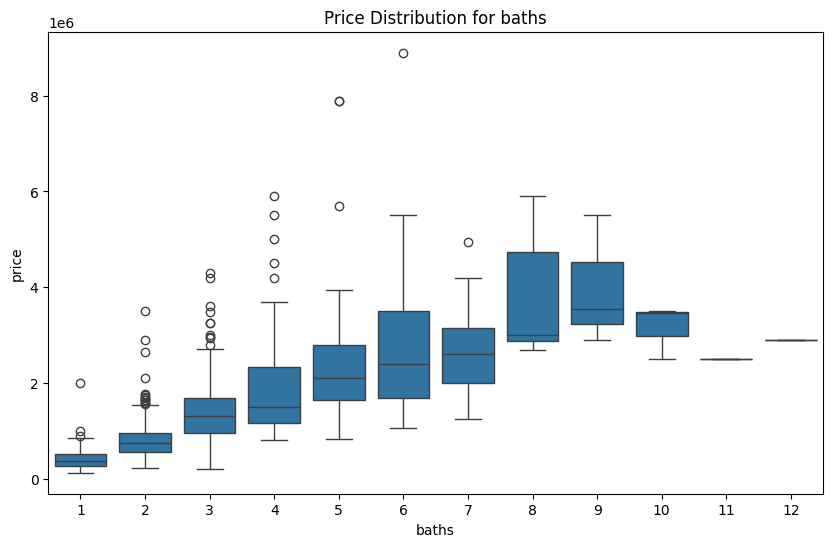

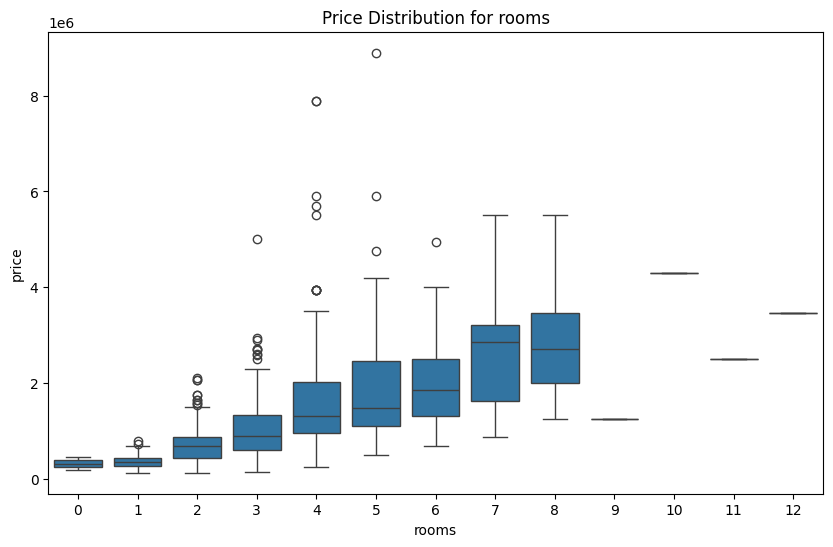

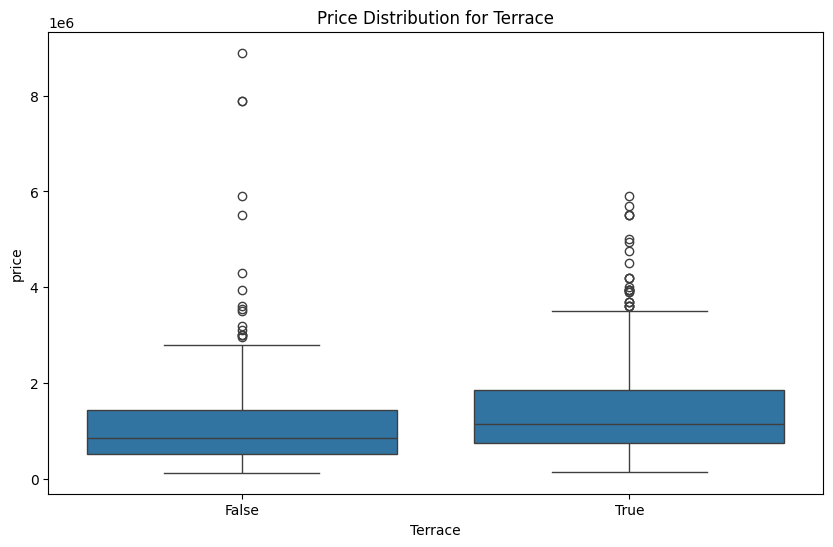

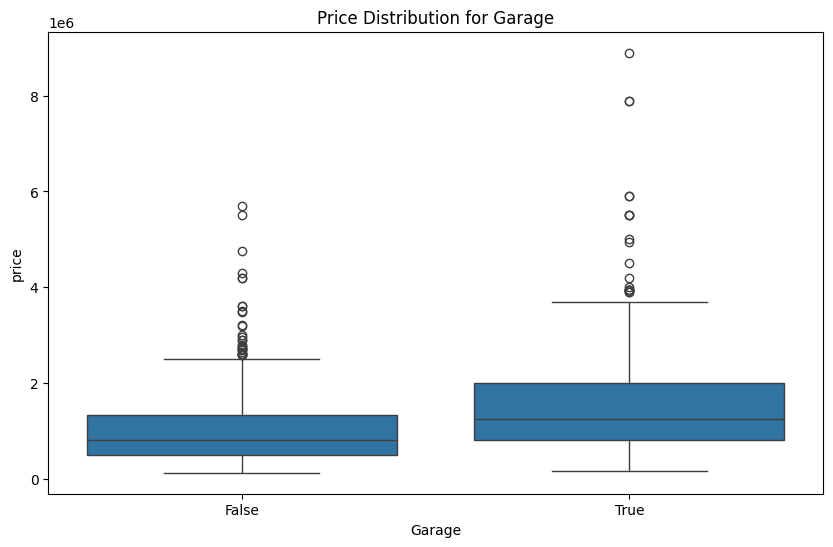

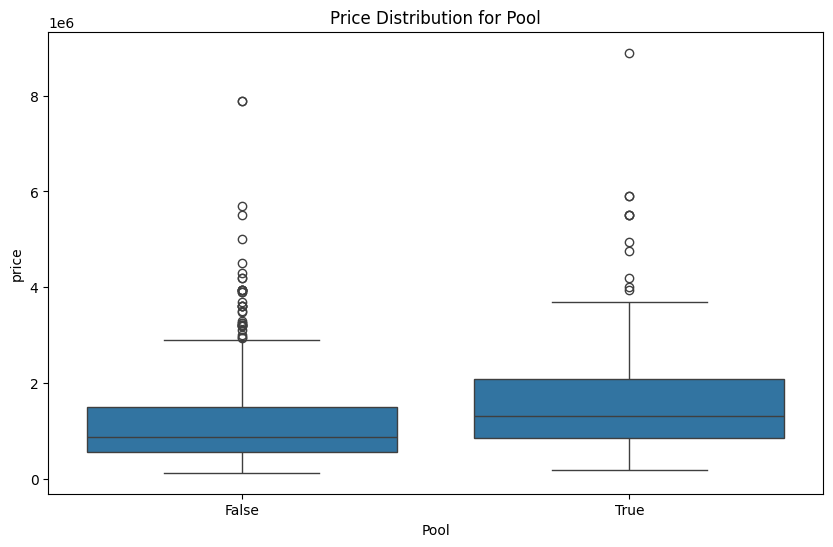

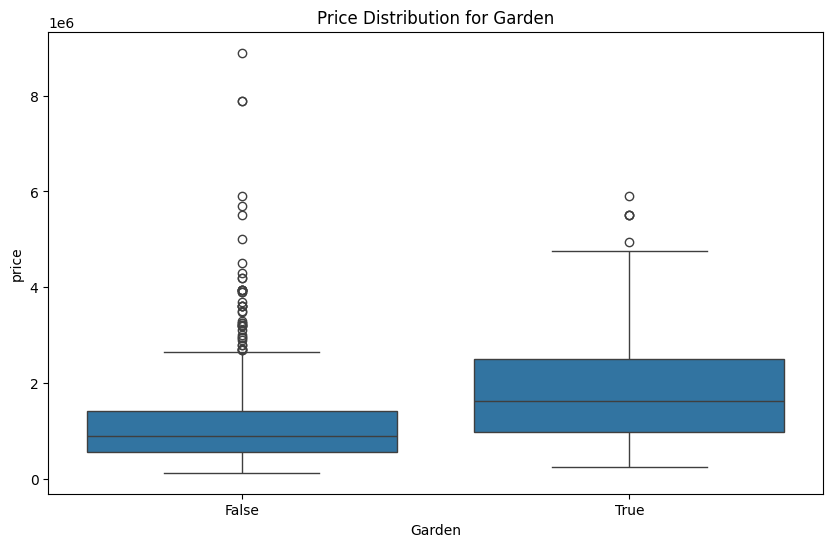

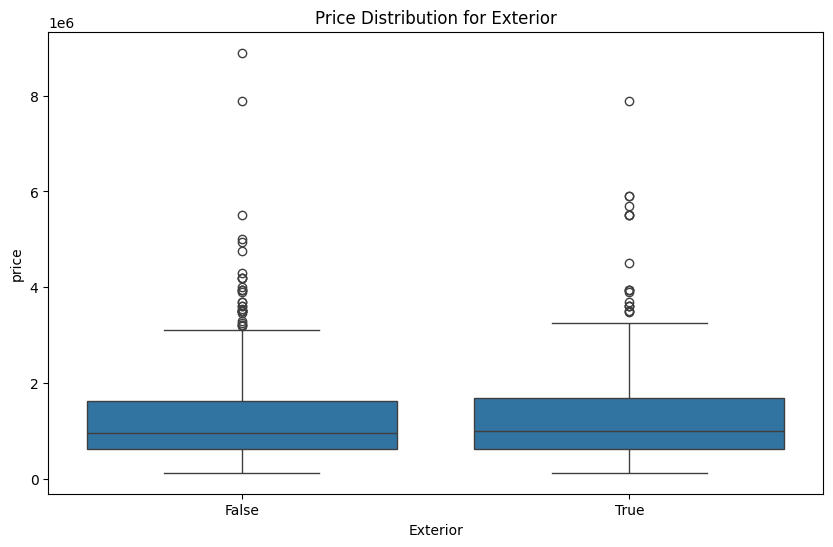

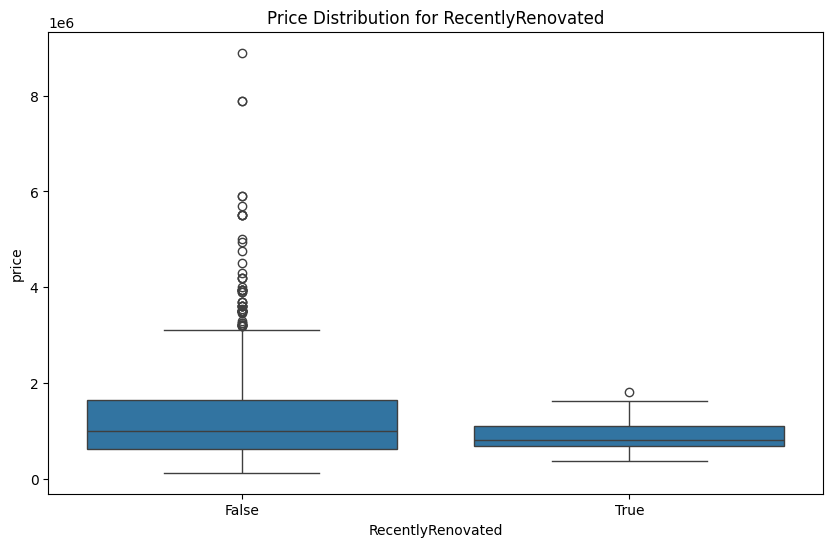

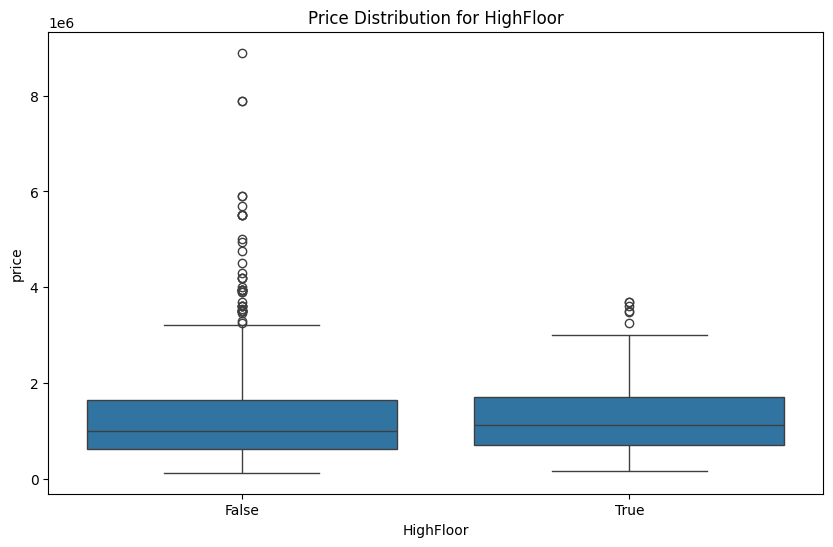

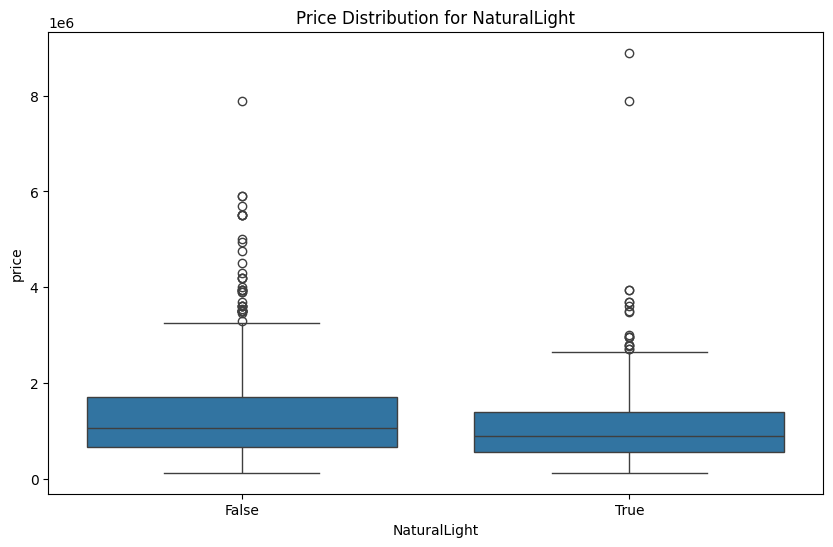

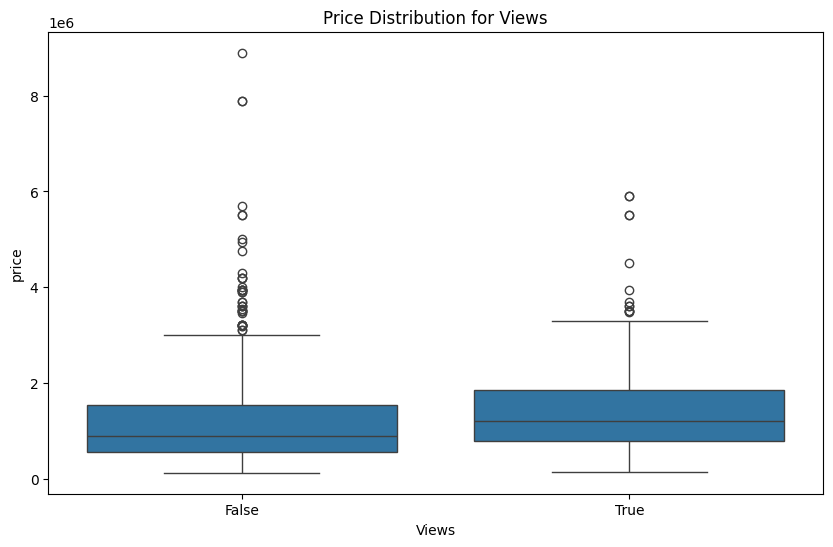

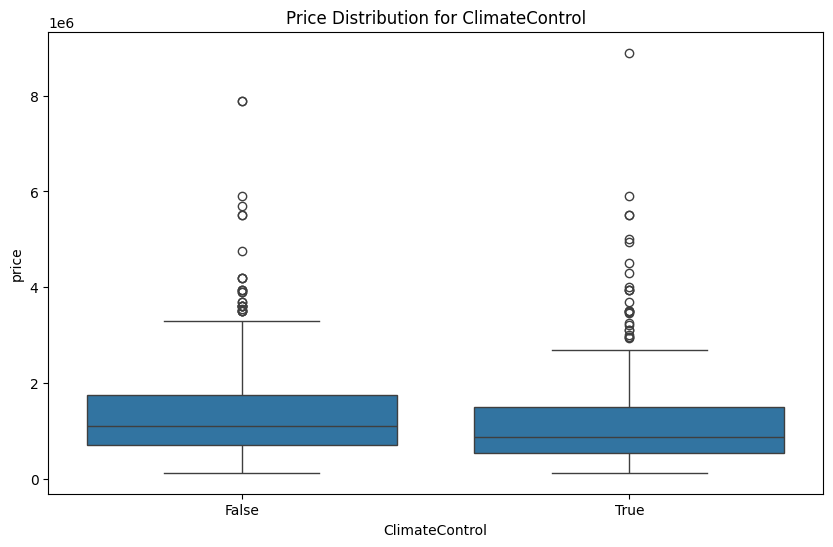

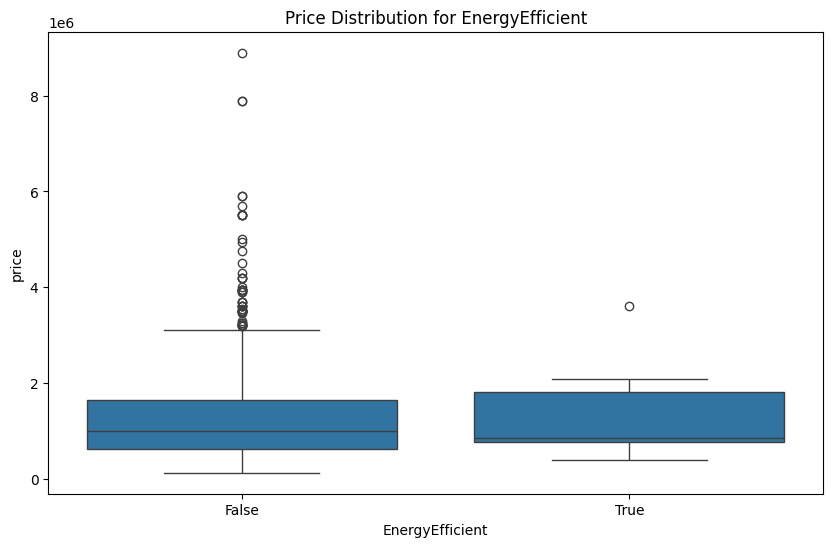

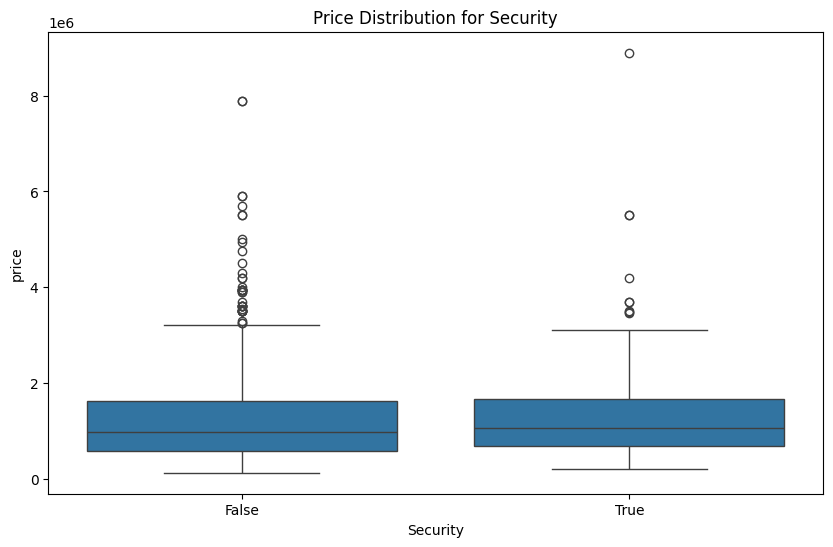

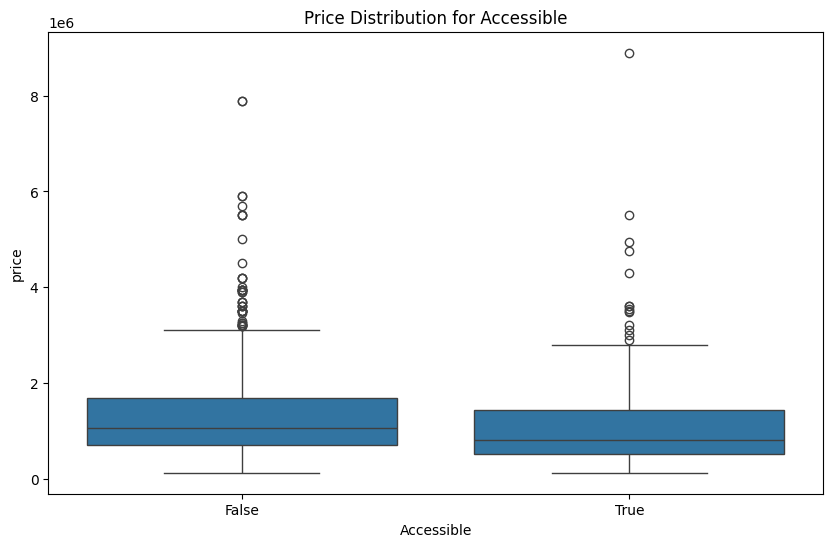

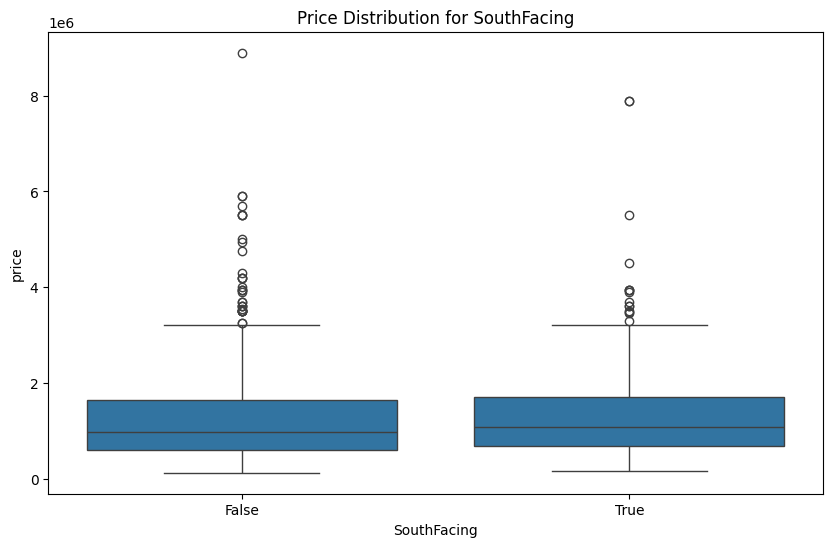

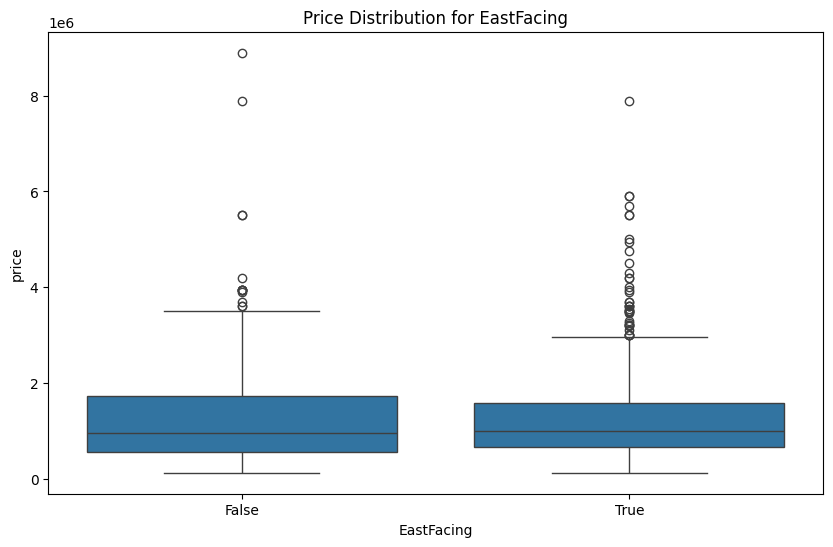

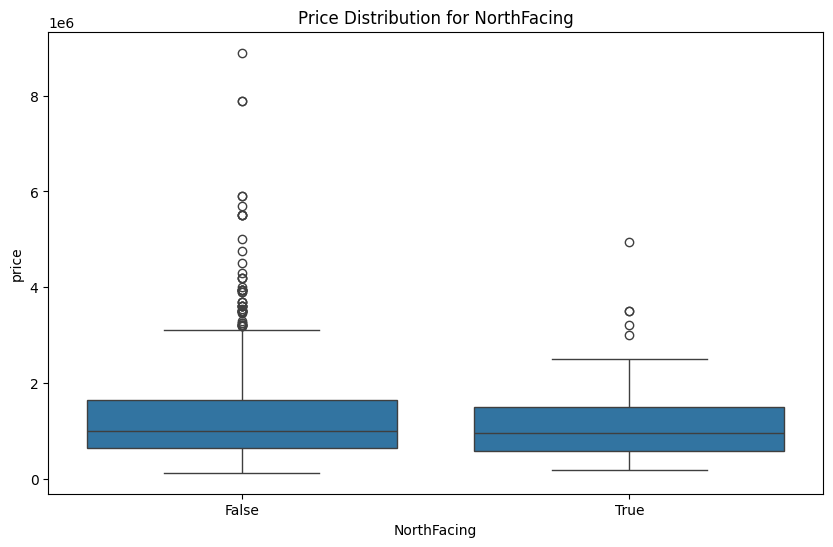

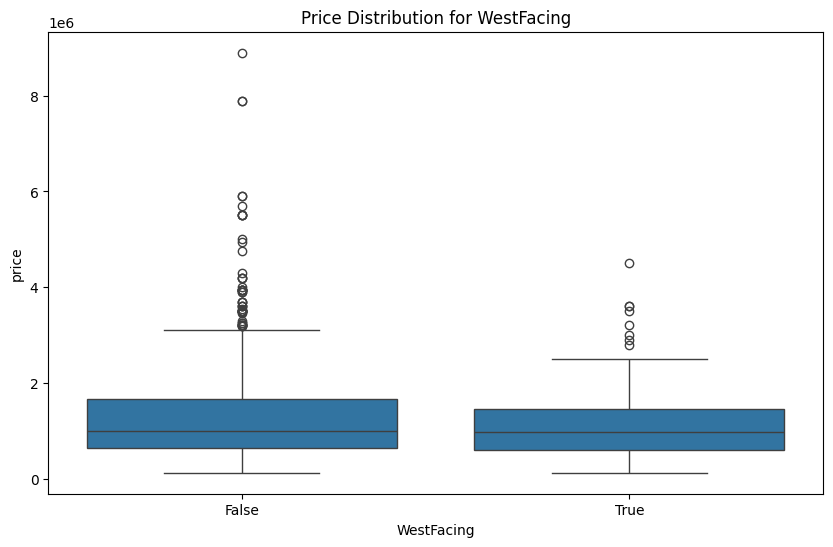

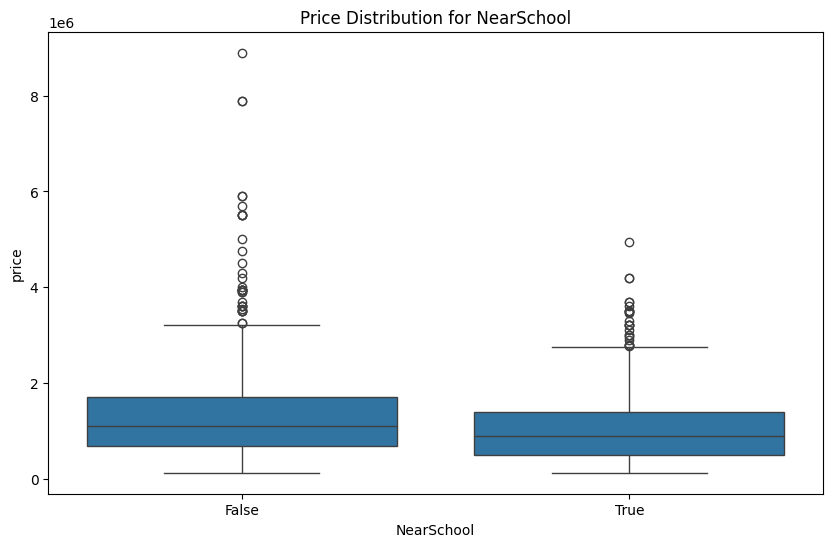

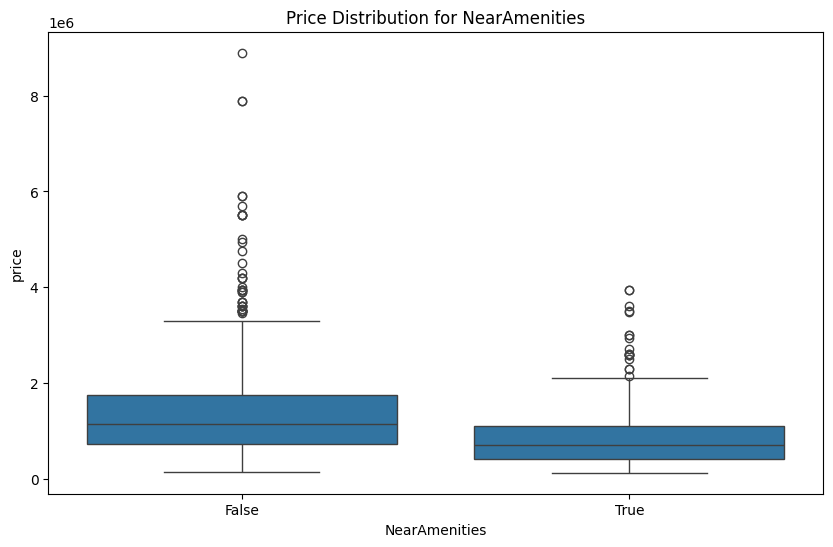

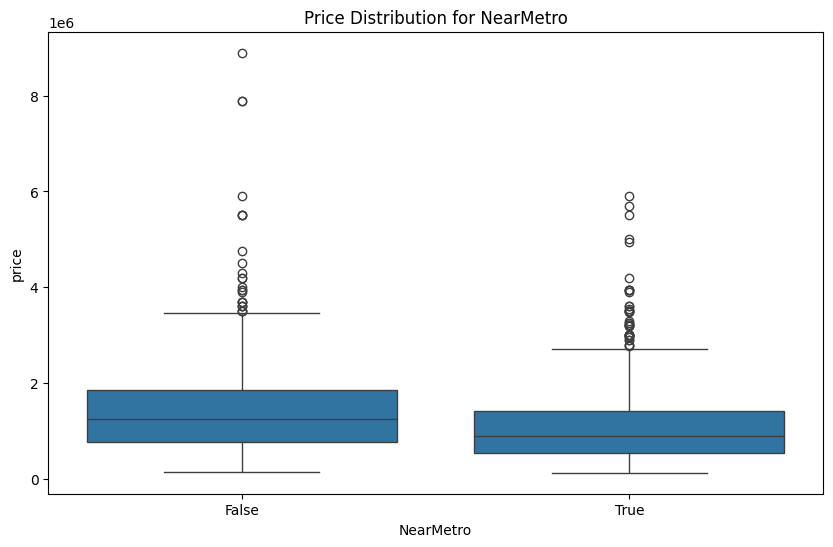

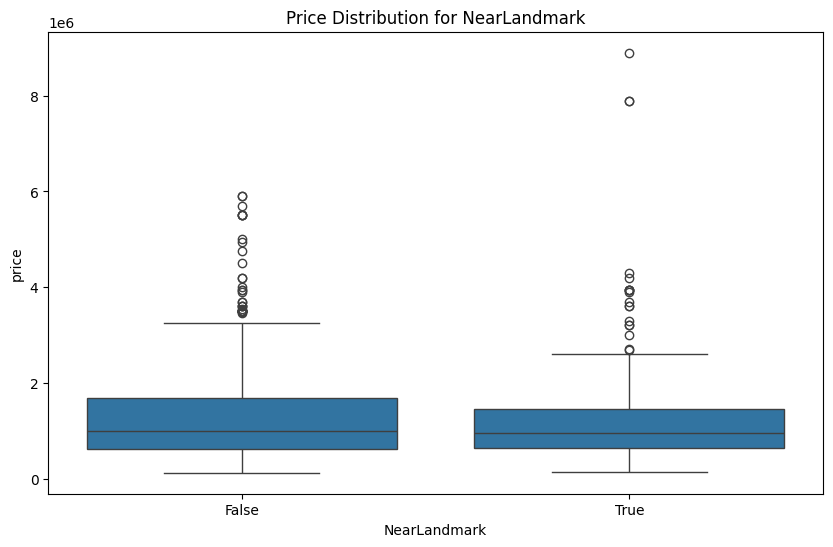

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
key_features = [
    'baths', 'rooms',
       'Terrace', 'Garage', 'Pool', 'Garden', 'Exterior', 'RecentlyRenovated',
       'HighFloor', 'NaturalLight', 'Views', 'ClimateControl',
       'EnergyEfficient', 'Security', 'Accessible', 'SouthFacing',
       'EastFacing', 'NorthFacing', 'WestFacing', 'NearSchool',
       'NearAmenities', 'NearMetro', 'NearLandmark'
]

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=enriched_data)
    plt.title(f'Price Distribution for {feature}')
    plt.show()


##**Box Plots for Price Distribution by District**##

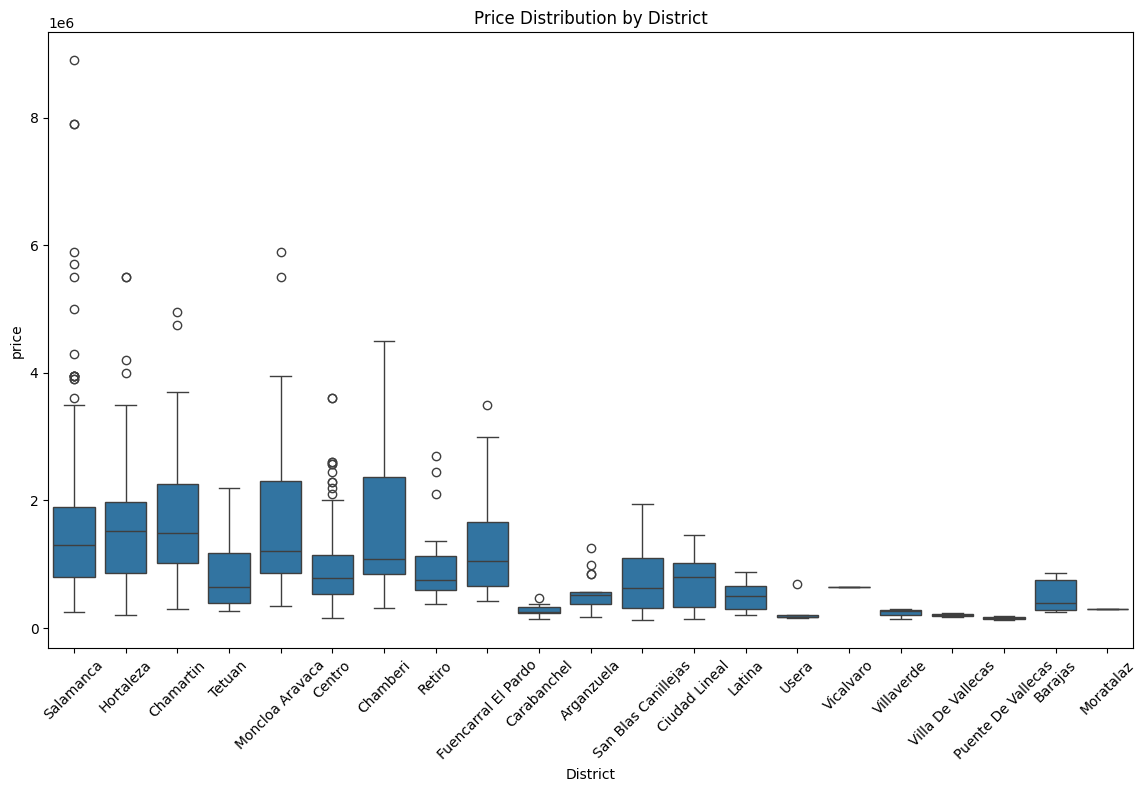

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='District', y='price', data=enriched_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by District')
plt.show()


##**Comparing Features Within Districts**##

In [22]:
districts = enriched_data['District'].unique()


features = ['Terrace', 'Garage', 'Pool', 'Garden', 'Exterior', 'RecentlyRenovated']

for district in districts:
    print(f"District: {district}")
    district_data = enriched_data[enriched_data['District'] == district]

    if not district_data.empty:
        for feature in features:
            print(f"Feature: {feature}")
            if feature in district_data.columns:
                print(district_data.groupby(feature)['price'].describe(), '\n')
            else:
                print(f"{feature} not found in the dataset.\n")
    else:
        print("No data available for this district.\n")


District: Salamanca
Feature: Terrace
         count          mean           std       min       25%        50%  \
Terrace                                                                     
False    103.0  1.519648e+06  1.445964e+06  250000.0  740000.0  1195000.0   
True      59.0  1.887695e+06  1.317806e+06  450000.0  847500.0  1495000.0   

               75%        max  
Terrace                        
False    1675000.0  8900000.0  
True     2195000.0  5700000.0   

Feature: Garage
        count          mean           std       min        25%        50%  \
Garage                                                                      
False   113.0  1.263053e+06  8.655465e+05  250000.0   720000.0  1074000.0   
True     49.0  2.554546e+06  1.926523e+06  510000.0  1200000.0  1950000.0   

              75%        max  
Garage                        
False   1495000.0  5700000.0  
True    3600000.0  8900000.0   

Feature: Pool
       count          mean           std       min        2

##**Heatmap for Price Distribution by Feature**##

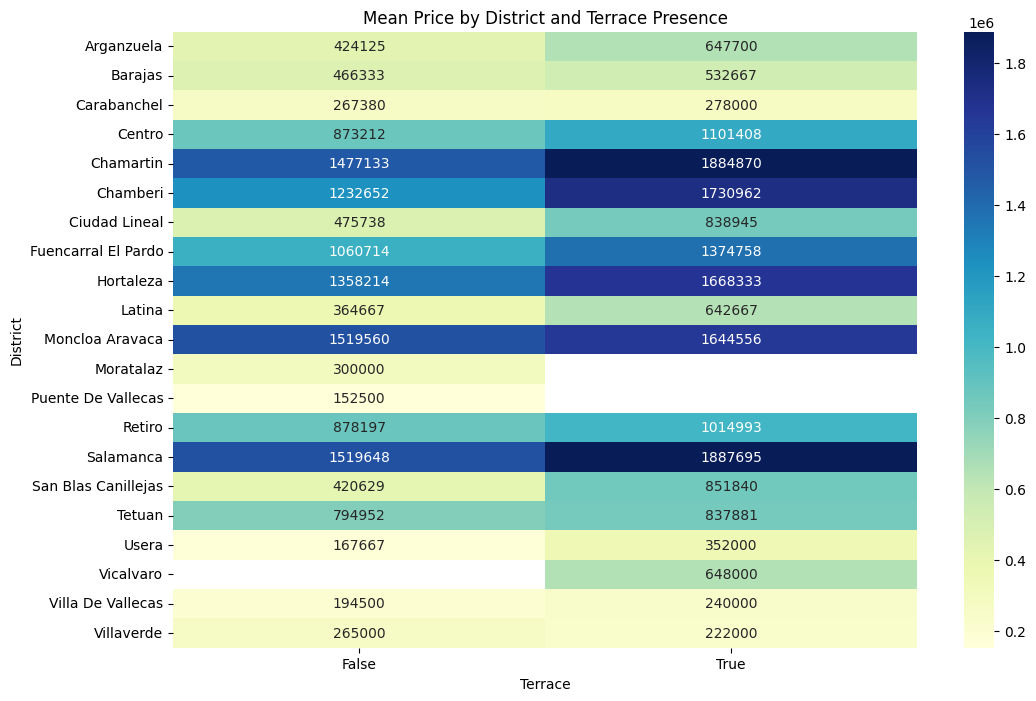

In [23]:

pivot_table = enriched_data.pivot_table(values='price', index='District', columns='Terrace', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Mean Price by District and Terrace Presence')
plt.show()


In [24]:
selected_features = [
    'baths', 'rooms', 'sqft', 'Terrace', 'Garage', 'Pool', 'Garden', 'Exterior',
    'RecentlyRenovated', 'HighFloor', 'NaturalLight', 'Views', 'ClimateControl',
    'EnergyEfficient', 'Security', 'Accessible', 'SouthFacing', 'EastFacing',
    'NorthFacing', 'WestFacing', 'NearSchool', 'NearAmenities', 'NearMetro',
    'NearLandmark', 'price_per_sqft', 'Surface', 'Density',
    'Population Median Age', 'People with Spanish Nationality',
    'People with Foreign Nationality', 'Households', 'Median House Size',
    'Demographic Growth Rate', 'Median Income', 'Median Unemployment Rate',
    'Median House Age', 'Education Level', 'Average House Size', 'Number of Houses',
    'Cadastral Value of Properties', 'Number of Concertado Schools',
    'Number of Private Schools', 'Number of Public Schools'
]

district_stats = enriched_data.groupby('District')[selected_features].describe()

print(district_stats)

                     baths                                                  \
                     count      mean       std  min   25%  50%   75%   max   
District                                                                     
Arganzuela            18.0  1.777778  0.808452  1.0  1.00  2.0  2.00   4.0   
Barajas                6.0  2.000000  0.894427  1.0  1.25  2.0  2.75   3.0   
Carabanchel           10.0  1.700000  0.483046  1.0  1.25  2.0  2.00   2.0   
Centro               139.0  2.093525  0.991939  1.0  1.00  2.0  3.00   6.0   
Chamartin             94.0  3.361702  1.450629  1.0  2.00  3.0  4.00   7.0   
Chamberi              98.0  2.663265  1.157173  1.0  2.00  2.5  3.00   6.0   
Ciudad Lineal         43.0  2.441860  1.220896  1.0  1.00  2.0  4.00   4.0   
Fuencarral El Pardo   47.0  3.829787  1.710824  1.0  2.00  4.0  5.00   8.0   
Hortaleza             86.0  4.069767  1.908438  1.0  2.00  4.0  5.00  10.0   
Latina                 6.0  1.833333  0.752773  1.0  1.25  2.0  

##**Price Comparison by Location**



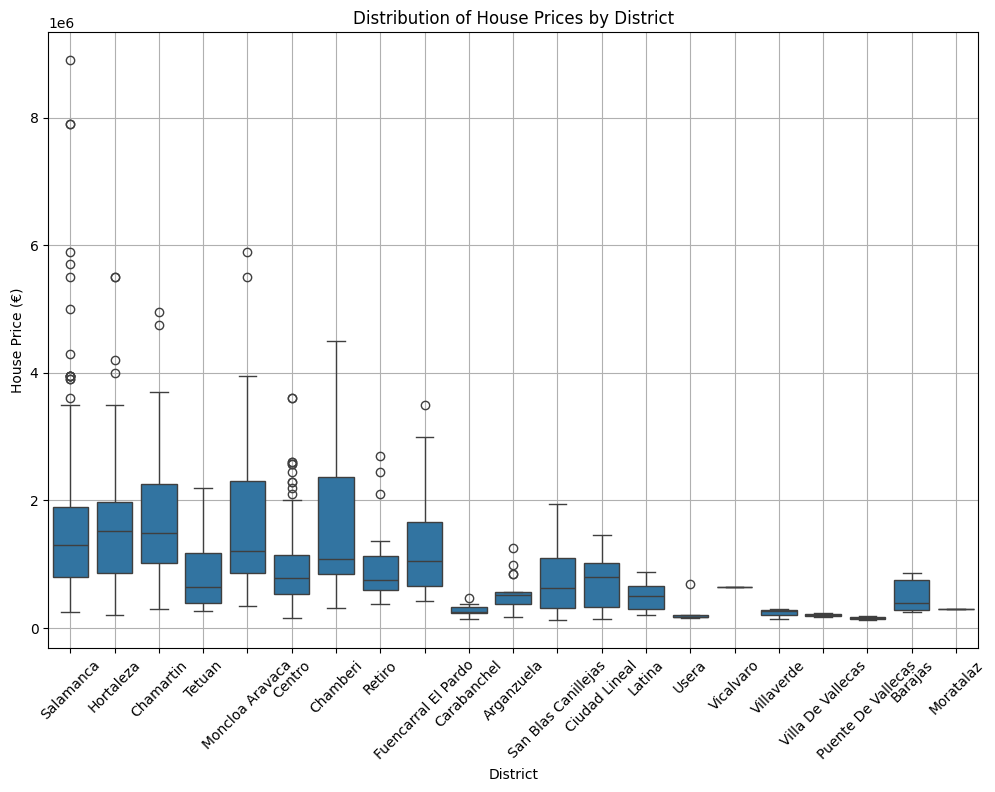

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=enriched_data, x='District', y='price')
plt.xticks(rotation=45)
plt.title('Distribution of House Prices by District')
plt.xlabel('District')
plt.ylabel('House Price (€)')
plt.grid(True)
plt.show()


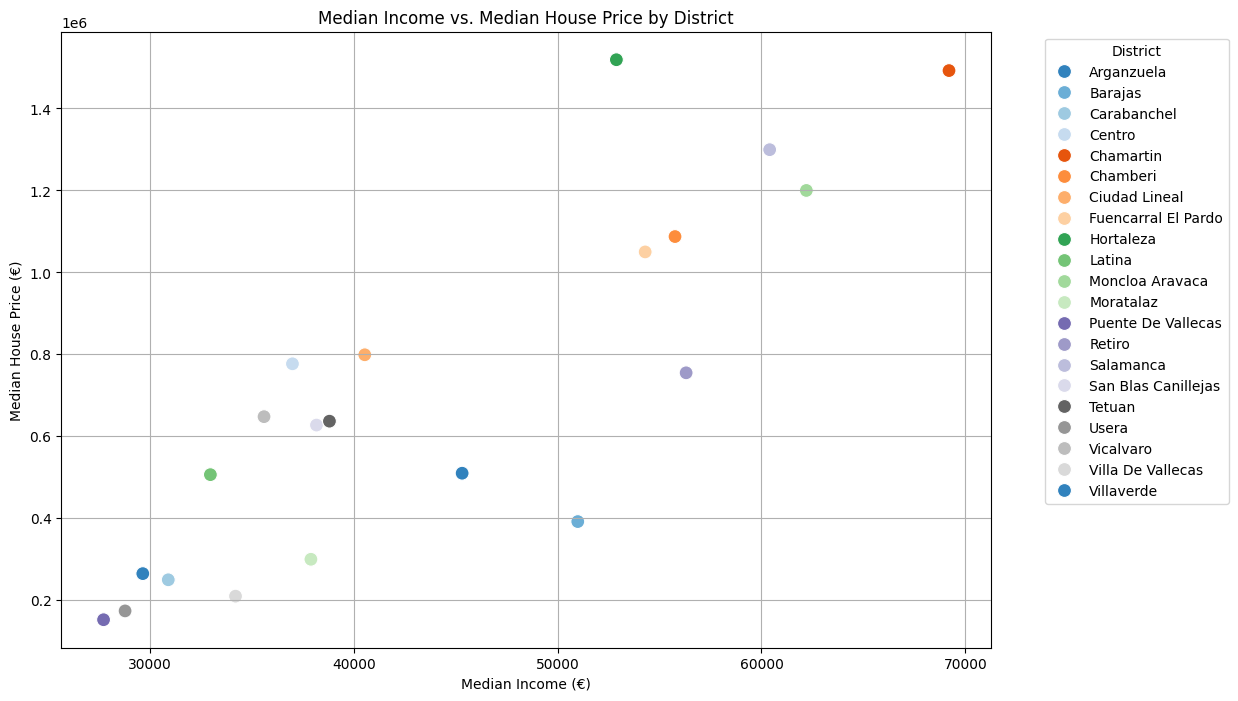

In [28]:

grouped_data = enriched_data.groupby('District').agg({
    'price': 'median',
    'Median Income': 'median'
}).reset_index()


plt.figure(figsize=(12, 8))
sns.scatterplot(data=grouped_data, x='Median Income', y='price', hue='District', palette='tab20c', s=100)
plt.title('Median Income vs. Median House Price by District')
plt.xlabel('Median Income (€)')
plt.ylabel('Median House Price (€)')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


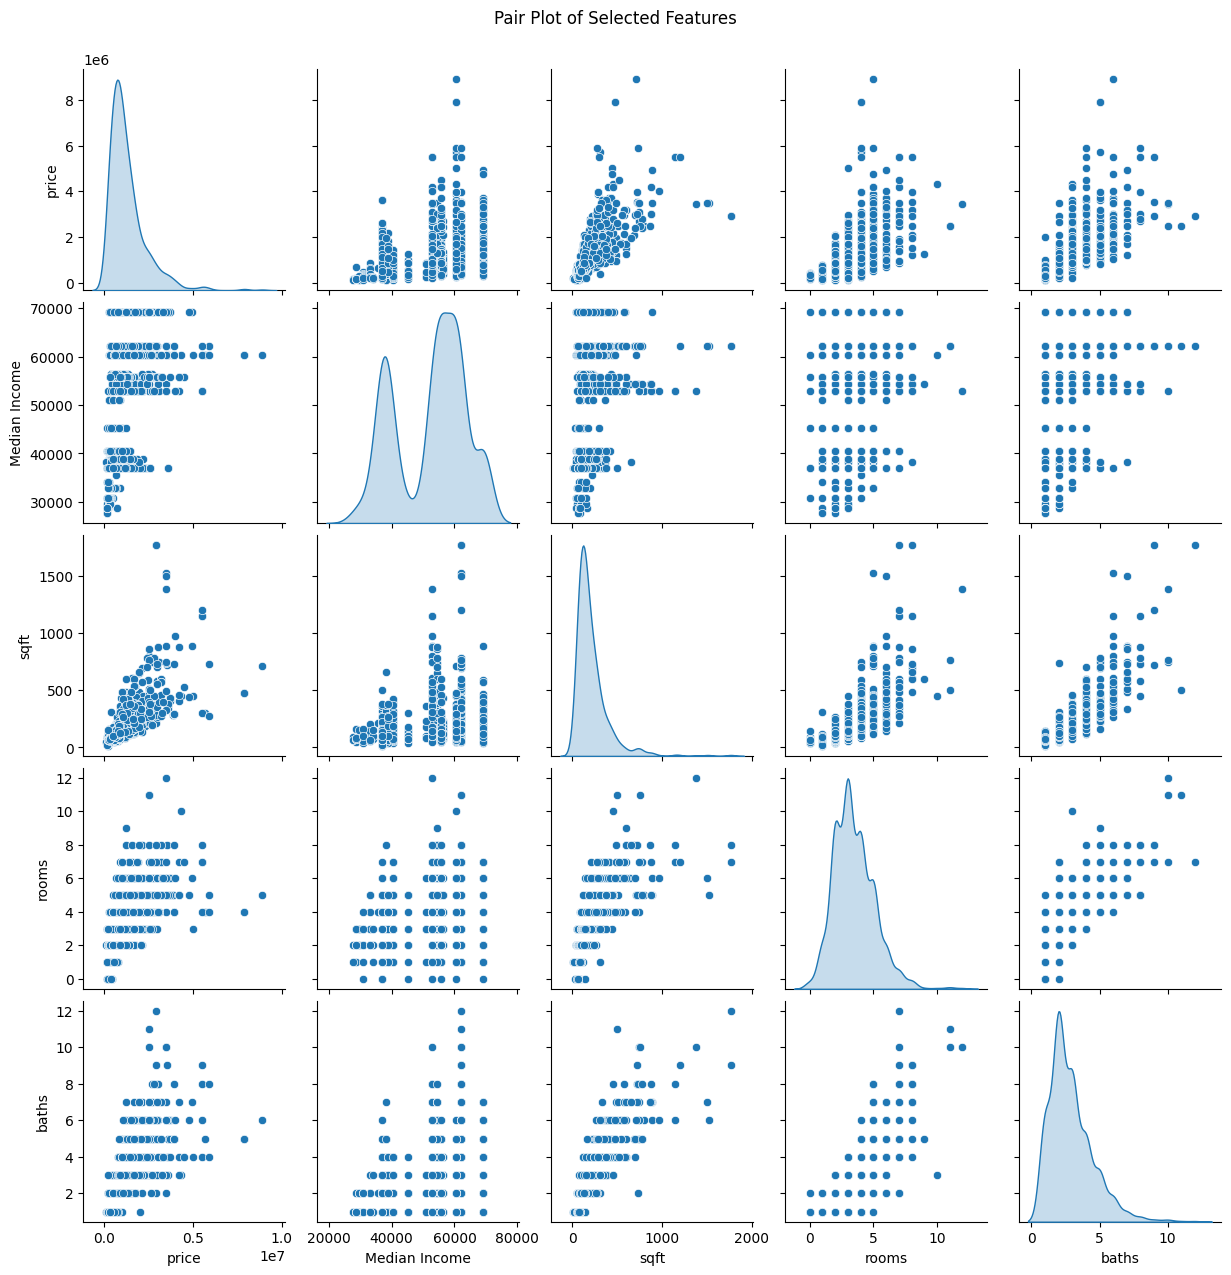

In [29]:
sns.pairplot(enriched_data[['price', 'Median Income', 'sqft', 'rooms', 'baths']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


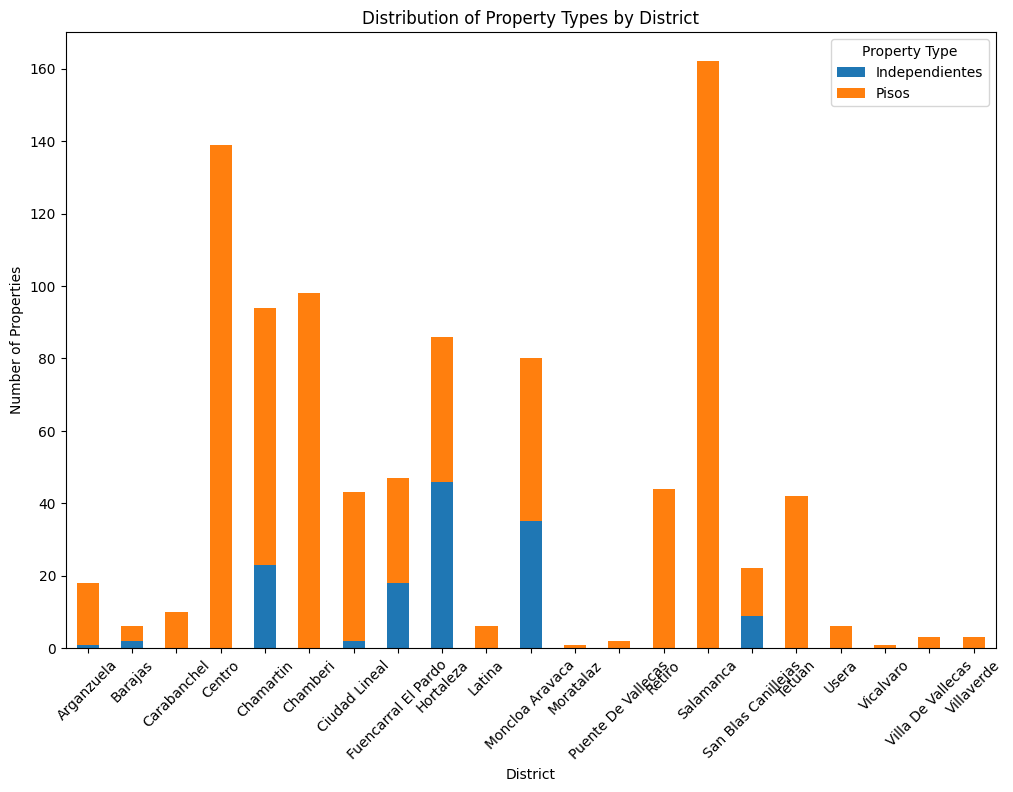

In [30]:

category_counts = enriched_data.groupby(['District', 'typology']).size().unstack(fill_value=0)


category_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Property Types by District')
plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.show()


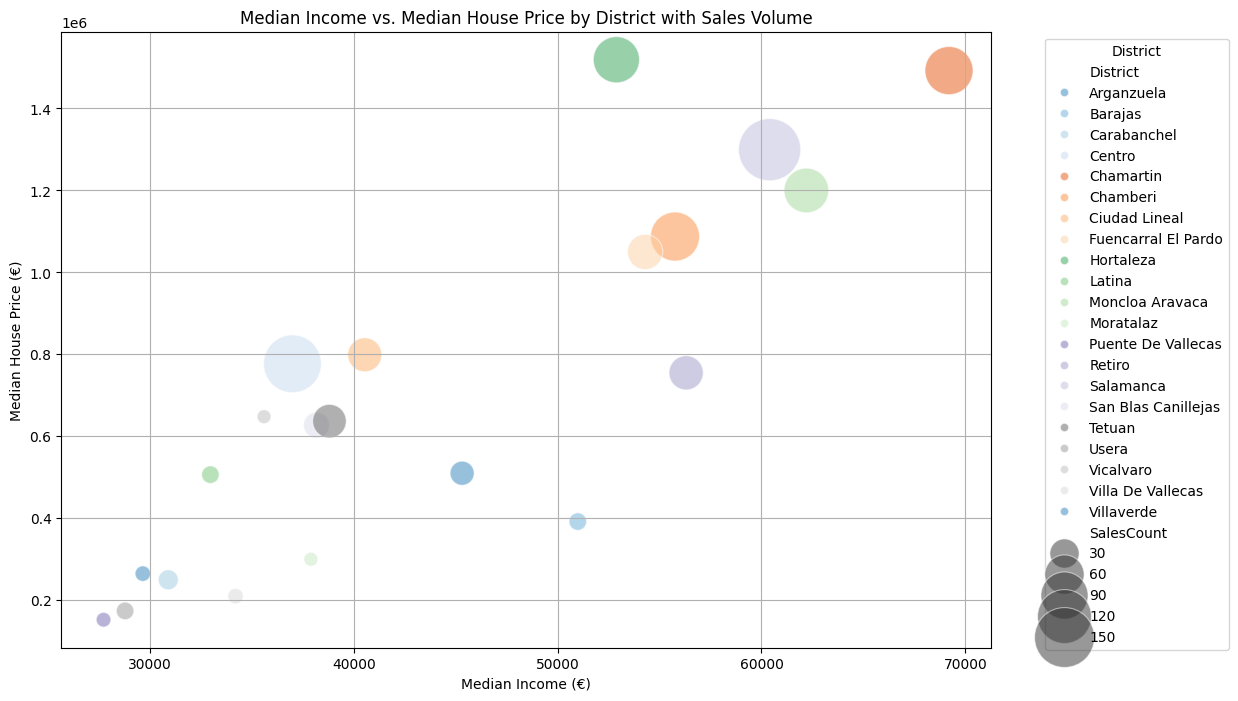

In [31]:

bubble_data = enriched_data.groupby('District').agg({
    'price': 'median',
    'Median Income': 'median',
    'District': 'size'
}).rename(columns={'District': 'SalesCount'}).reset_index()



plt.figure(figsize=(12, 8))
sns.scatterplot(data=bubble_data, x='Median Income', y='price', size='SalesCount', hue='District', sizes=(100, 2000), alpha=0.5, palette='tab20c')
plt.title('Median Income vs. Median House Price by District with Sales Volume')
plt.xlabel('Median Income (€)')
plt.ylabel('Median House Price (€)')
plt.grid(True)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
import folium

geo_path = '/content/drive/MyDrive/TFG/Dataset/madrid-districts.geojson'


map = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=bubble_data,
    columns=['District', 'price'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median House Price (€)'
).add_to(map)

folium.LayerControl().add_to(map)

map


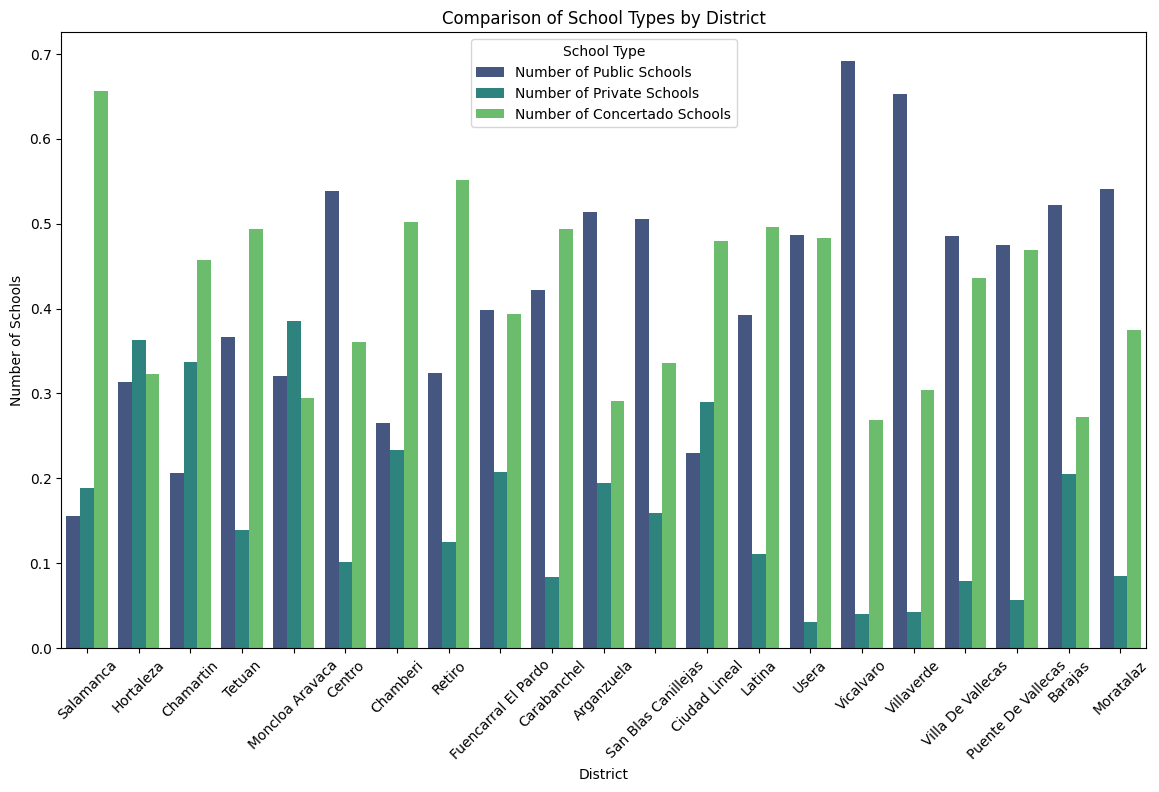

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

school_types = ['Number of Public Schools', 'Number of Private Schools', 'Number of Concertado Schools']

melted_schools = pd.melt(enriched_data, id_vars=['District'], value_vars=school_types, var_name='School Type', value_name='Number of Schools')

plt.figure(figsize=(14, 8))
sns.barplot(data=melted_schools, x='District', y='Number of Schools', hue='School Type', palette='viridis')
plt.title('Comparison of School Types by District')
plt.xlabel('District')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.legend(title='School Type')
plt.show()

